# S11 T01: Agrupa els diferents vols

**Objectius:**
 - Kmeans
 - Clustering jeràrquic

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch

In [67]:
# We upload a sample cleaned from NaN, standarrized and with unique carriers with less than 10flights being deleted from the Exercise S10 T01
df = pd.read_csv('DelayFlightsClassificacio.csv')

In [68]:
# The models normally performs better with data that has been pre-cleaned and prepared before it can used
# We upload the sample Prepared (Cleaned, Normallize, Standarize & Dummy Var) from the Exercise S09 T01
#df = pd.read_csv ('DelayFlightsPreparedDataSample_NO_PCA.csv')

In [69]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,ActualElapsedTime,AirTime,ArrDelay,DepDelay,...,Dest_SWF,Dest_SYR,Dest_TLH,Dest_TPA,Dest_TUL,Dest_TUS,Dest_TVC,Dest_TYS,Dest_VPS,Dest_XNA
0,2008,2,24,7,1350.0,1950.0,360.0,285.0,1,0.122268,...,0,0,0,0,0,0,0,0,0,0
1,2008,6,13,5,2.0,513.0,311.0,292.0,0,-0.024172,...,0,0,0,0,0,0,0,0,0,0
2,2008,5,21,3,2316.0,2448.0,92.0,77.0,1,0.616502,...,0,0,0,0,0,0,0,0,0,0
3,2008,12,5,5,951.0,1138.0,107.0,88.0,1,0.415147,...,0,0,0,0,0,0,0,0,0,0
4,2008,11,7,5,1812.0,2103.0,171.0,131.0,1,0.634807,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df.shape

(18899, 333)

In [71]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'ActualElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay',
       ...
       'Dest_SWF', 'Dest_SYR', 'Dest_TLH', 'Dest_TPA', 'Dest_TUL', 'Dest_TUS',
       'Dest_TVC', 'Dest_TYS', 'Dest_VPS', 'Dest_XNA'],
      dtype='object', length=333)

In [72]:
def KMeans_func(df, k):
    global kmeans
    kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    # SSE values
    sse.append(kmeans.inertia_)
    
    # silhouette coefficients
    if k>= 2:
        score = silhouette_score(df, kmeans.labels_)
        silhouette_coefficients.append(score)


## Exercici 1
Agrupa els diferents vols utilitzant l'algorisme de K-means.

## Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

Biografia:
 - https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68
 - https://realpython.com/k-means-clustering-python/

In [73]:
#!pip install kneed

K-means clustering require to input the number of clusters. Instead of guessing the number of clusters we can use the following methods.

**Choosing the Appropriate Number of Clusters**

Two methods that are commonly used to evaluate the appropriate number of clusters:
 - The elbow method
 - The silhouette coefficient
 
These are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the  sum of the squared error (SSE):

In [74]:
global sse, silhouette_coefficients
# A list holds the SSE values for each k
sse = []
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(1, 11):
    KMeans_func(df, k)

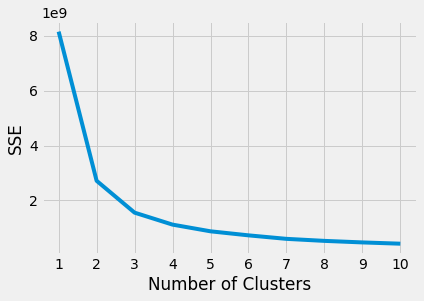

In [75]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [76]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

print ('Using the elbow method, the ideal number of clusters is ', kl.elbow)

Using the elbow method, the ideal number of clusters is  3


The **silhouette coefficient** is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:
 - How close the data point is to other points in the cluster
 - How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

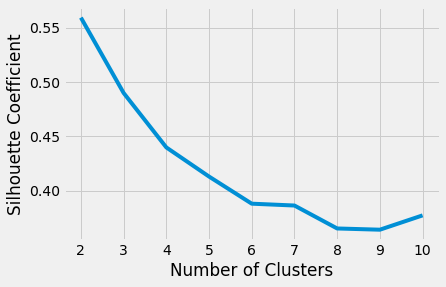

In [77]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Using the Cilhouette Coefficient the ideal number of clusters to be used would be 2.

We make graphs with 2 and 3 clusters to visualize the differences.

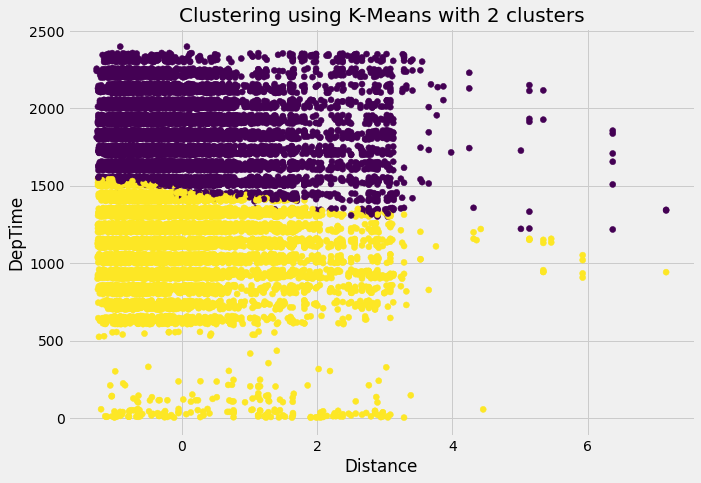

In [78]:
KMeans_func(df, 2)
plt.figure(figsize=(10, 7))  
plt.scatter(df['Distance'], df['DepTime'], c=kmeans.labels_) 
plt.title ('Clustering using K-Means with 2 clusters', size=20)
plt.xlabel ('Distance')
plt.ylabel ('DepTime');

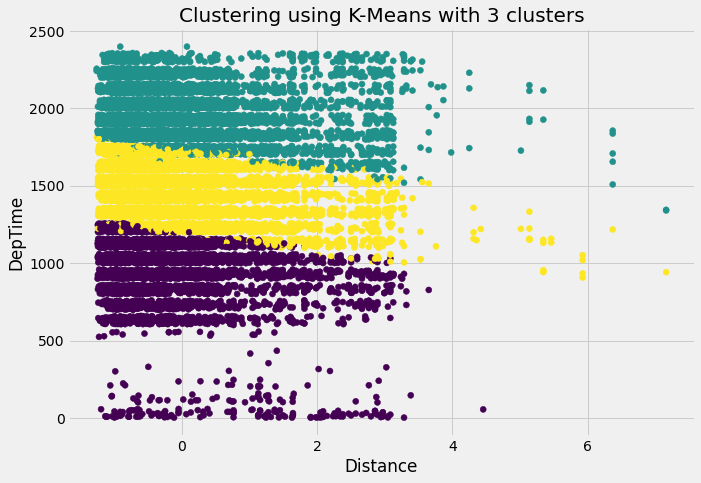

In [79]:
KMeans_func(df, 3)
plt.figure(figsize=(10, 7))  
plt.scatter(df['Distance'], df['DepTime'], c=kmeans.labels_) 
plt.title ('Clustering using K-Means with 3 clusters', size=20)
plt.xlabel ('Distance')
plt.ylabel ('DepTime');

Finally we check do clustering using PCA to reduce the number of variables.

In [86]:
from sklearn.decomposition import PCA

#The target variable is ArrDelay 
X = df.drop(['ArrDelay'], axis=1).values
y = df.ArrDelay.values

In [87]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
pca_df1 = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])

pca_df_final = pd.concat([pca_df1, df[['ArrDelay']]], axis = 1)

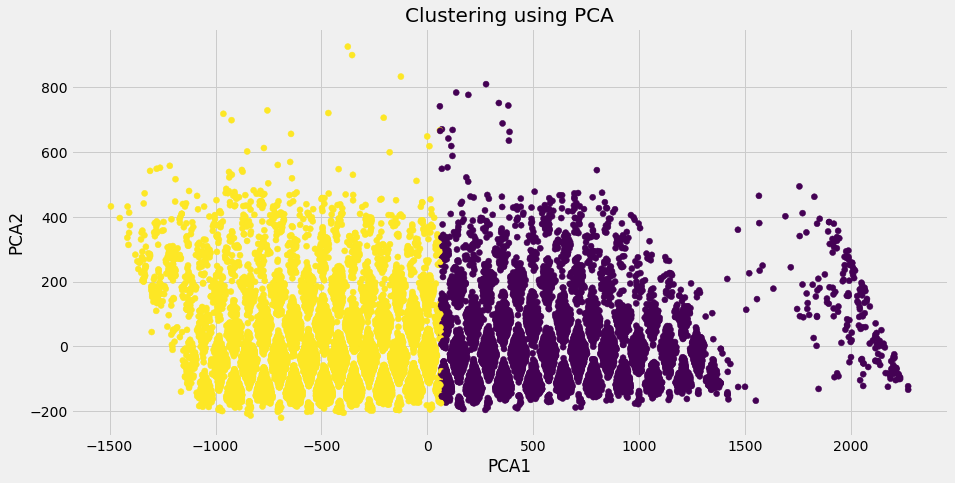

In [88]:
KMeans_func(pca_df_final, 2)
plt.figure(figsize=(14, 7))  
plt.scatter(pca_df_final['PCA1'], pca_df_final['PCA2'], c=kmeans.labels_) 
plt.title('Clustering using PCA', size=20)
plt.xlabel ('PCA1')
plt.ylabel ('PCA2');

## Exercici 2
Agrupa els diferents vols utilitzant l'algorisme de clustering jeràrquic.

Biography:
 - https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019
 - https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 70000 and cut the dendrogram

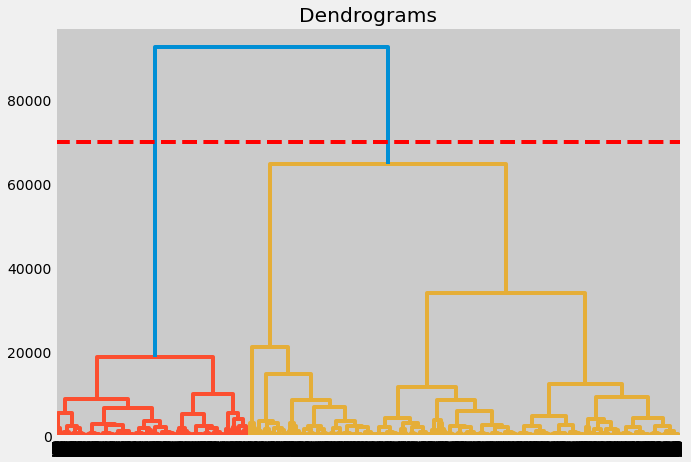

In [83]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(df, method='ward'))
plt.axhline(y=70000, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters

In [84]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

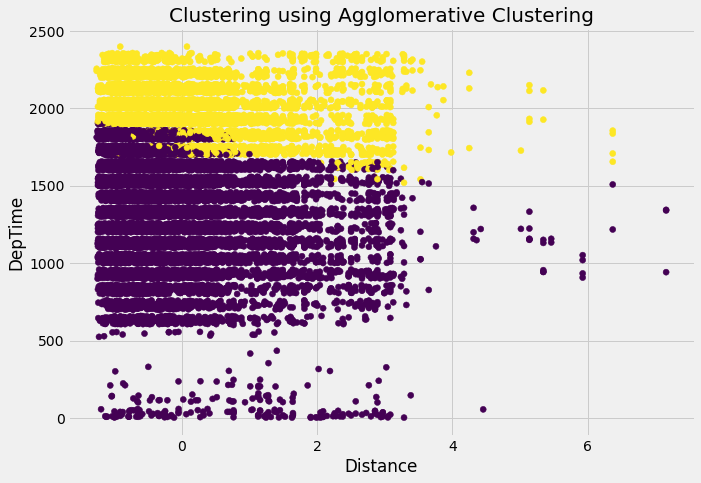

In [85]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['Distance'], df['DepTime'], c=cluster.labels_) 
plt.title('Clustering using Agglomerative Clustering', size=20)
plt.xlabel ('Distance')
plt.ylabel ('DepTime');